In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df=pd.read_csv('train.csv',usecols=['Age',"Fare","Survived"])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(714, 3)

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6345070422535211)

In [ ]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_Fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [ ]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_age,[1])
],remainder='passthrough'
)

In [ ]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [ ]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [ ]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [ ]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [ ]:
output['fare_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
102,21.0,4.0,77.2875,13.0,"(19.0, 21.0]","(18.75, 26.0]"
534,30.0,8.0,8.6625,4.0,"(28.0, 30.0]","(26.55, 31.275]"
398,23.0,5.0,10.5000,5.0,"(21.0, 23.0]","(18.75, 26.0]"
733,23.0,5.0,13.0000,6.0,"(21.0, 23.0]","(18.75, 26.0]"
817,31.0,8.0,37.0042,11.0,"(30.0, 32.0]","(26.55, 31.275]"


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [ ]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6358959311424099)

In [36]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_age,[1])
   ],remainder='passthrough'
   )
  x_trf=trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title('before')

  plt.subplot(122)
  plt.hist(x_trf[:,0],color='red')
  plt.title('after')
  plt.show()

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Fare'])
  plt.title('before')

  plt.subplot(122)
  plt.hist(x_trf[:,1],color='red')
  plt.title('after')
  plt.show()


0.6317097026604068


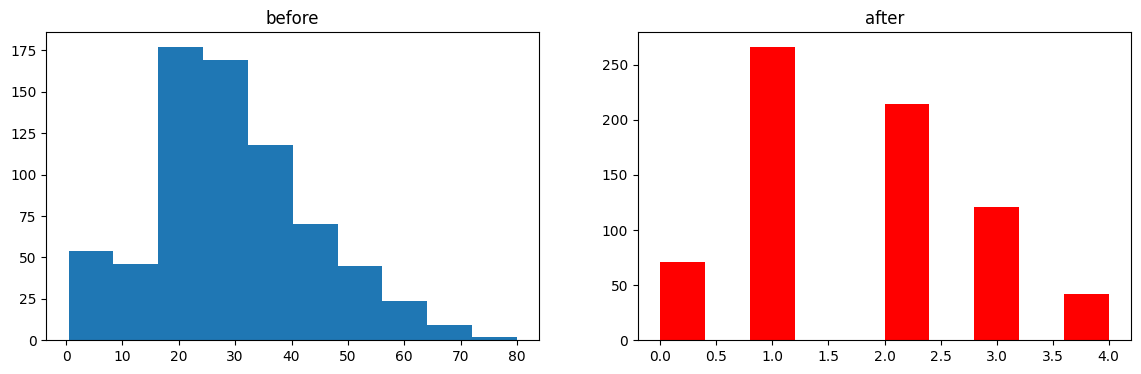

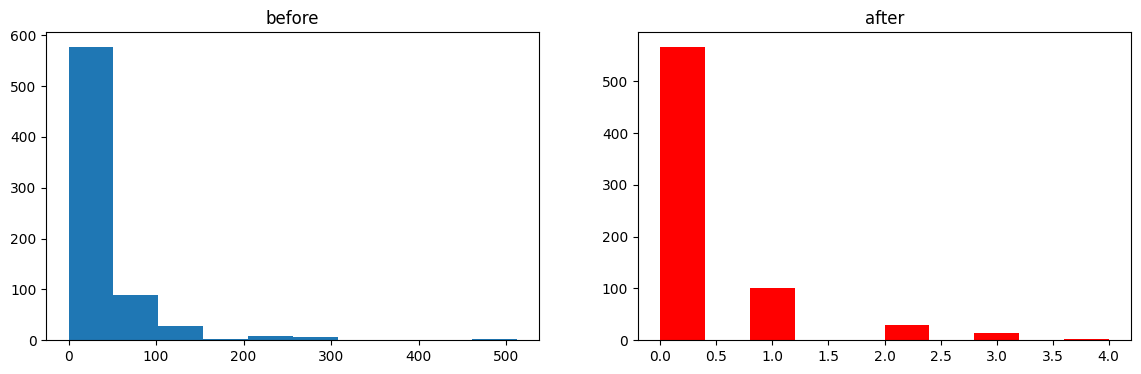

In [37]:
discretize(5,'kmeans')